# Physics 512 -  Problem Set 7

Kit M. Gerodias

In [1]:
#[ Modules ]
import numpy as np
from IPython.display import display, Markdown
from matplotlib import pyplot as plt

# Problem No. 1

Given the following equations:\
$$ \frac{f(t+dt,x) - f(t-dt,x)}{2 dt} = -v \frac{f(t,x+dx) - f(t,x-dx)}{2dx}$$\
and 
$$ f(t,x) = {\xi}^{t} e^{jkx_i}.$$
Note: I am using ${j}$ as the notation for imaginary number.\
\
Discretizing the equations above:
$$ f_i^{n+1} - f_i^{n-1} = \alpha \biggl[f_{i+1}^n - f_{i-1}^n \biggr]$$
and 
$$ f_i^n = \xi^n e^{jkx_i}$$
respectively, where $ \alpha = -v \frac{dt}{dx}$.

Substituting the second equation to the first,
$$ \xi^{n+1} e^{jkx_i} - \xi^{n-1} e^{jkx_i} = \alpha \biggl[ \xi^n e^{jkx_{i+1}} - \xi^n e^{jkx_{i-1}} \biggr] $$
with $x_{i+1} = x_i + h$ and $x_{i-1} = x_i -h$, and dividing both sides by $\xi^n$ we get,
$$ \xi e^{jkx_i} - \xi^{-1} e^{jkx_i} = \alpha \biggl[ e^{jk(x_i+h)} - e^{jk(x_i-h)} \biggr] $$
and finally, dividing both sides by $e^{jkx_i}$,
$$ \xi - \xi^{-1} = \alpha \biggl[e^{jkh} - e^{-jkh} \biggr] =j 2 \alpha \sin{kh} $$.

Since the range of sine is $[-1,1]$, the RHS range must be $[-j2\alpha,j2\alpha]$. When CFL condition $\lvert \alpha \rvert \leq 1$ holds, RHS range becomes $ [-2j, 2j]$. Thus, equating the range to the LHS, we get $ \xi - \xi^{-1} = \pm 2j $. And solving for this quadratic equation results to $ \lvert \xi \rvert = 1$.


Energy is preserved when time reversability can be demonstrated. Time reversability is when going backward (in step) is the same as going forward. In this case, $ f_i^{n'+1}$ when $n' = n-1$ must be equal to $f_i^{n'-1}$ when $n'= n+1$.\
Thus, for $ f_i^{n'+1}$ when $n' = n-1$,\
$ f_{i}^{n'+1}  = f_{i}^{n'-1} + \alpha \biggl[ f_{i+1}^{n'} - f_{i-1}^{n'} \biggr] $\
$ f_i^n = f_{i}^{n-2} + \alpha \biggl[ f_{i+1}^{n-1} - f_{i-1}^{n-1} \biggr] $\
$\xi^n e^{jkx_i} = \xi^{n-2}e^{jkx_i} + \alpha \biggl[ \xi^{n-1} e^{jk(x_i+h)} - \xi^{n-1} e^{jk(x_i-h)} \biggr]$\
$1 = \xi^{-2} + \alpha \xi^{-1} \biggl[e^{jkh} - e^{-jkh} \biggr]$\
$1 = \xi^{-2} + j 2 \alpha \xi^{-1} \sin{kh}$.\
Similarly, for $f_i^{n'-1}$ when $n'= n+1$,\
$ -f_{i}^{n'-1}  = - f_{i}^{n'+1} + \alpha \biggl[ f_{i+1}^{n'} - f_{i-1}^{n'} \biggr] $\
$ -f_{i}^{n}  = - f_{i}^{n+2} + \alpha \biggl[ f_{i+1}^{n+1} - f_{i-1}^{n+1} \biggr] $\
$-\xi^n e^{jkx_i} = -\xi^{n+2}e^{jkx_i} + \alpha \biggl[ \xi^{n+1} e^{jk(x_i+h)} - \xi^{n+1} e^{jk(x_i-h)} \biggr]$\
$-1 = -\xi^{2} + \alpha \xi \biggl[e^{jkh} - e^{-jkh} \biggr]$\
$-1 = -\xi^{2} + j 2 \alpha \xi \sin{kh}$.\
Thus, the two equations are reduced to,
$$1 = \xi^{-2} + j 2 \alpha \xi^{-1} \sin{kh}$$
$$1 = \xi^{2} - j 2 \alpha \xi \sin{kh}$$

The two preceding equations are equivalent when $ \lvert \xi \rvert = 1$ or $ \xi = \pm 1$, the value for $\xi$ in which CFL condition holds. Therefore, energy is preserved.


https://people.maths.ox.ac.uk/trefethen/4all.pdf \
http://www.physics.drexel.edu/~steve/Courses/Comp_Phys/Integrators/leapfrog/

# Problem No. 2

### (a)

From: https://physics.stackexchange.com/questions/44515/electric-field-and-electric-potential-of-a-point-charge-in-2d-and-1d#:~:text=The%20Coulomb%20potential%20has%20the,has%20to%20be%20a%20constant.

We can say that the potential V of the point charge is expressed as the following:
$$ V = -C \ln(r) $$
where $C$ is a constant (or variable ) dependent on the point charge and electrostatic constants and $r = \sqrt{x^2 + y^2}$.\
A Poisson equation, when discretized results to:
$$ \rho_{point} = V_{point} - \frac{1}{4}(V_{up} + V_{down} + V_{left} + V_{right})$$
Thus, at point [1,0],
$$ V[1,0] =  \frac{1}{4}(V[1,1] + V[1,-1] + V[2,0] + V[0,0]) $$
$$ -C\ln(1) = \frac{1}{4} \biggl(-C\ln\sqrt2 -C\ln\sqrt2 -C\ln(2) + 1 \biggr) $$
$$ 0 = \frac{1}{4} (-2C\ln(2) + 1 ) $$
$$ 0 =  -\frac{1}{2}C\ln(2) + \frac{1}{4} $$
$$ \frac{1}{2}C\ln(2) = \frac{1}{4}$$
$$ C = \frac{1}{2\ln(2)}$$

In [7]:
C = 1/(2*np.log(2))
print("C = ", round(C,2))

C =  0.72


Thus, $V = - 0.72 \ln(r)$.

In [15]:
#Sanity check
#V[5,0] = -1.05

V_50 = -C*np.log(5)
print("V[5,0] =", round(V_50,2))

V[5,0] = -1.16


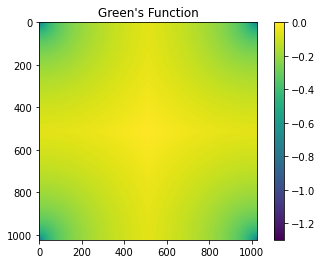

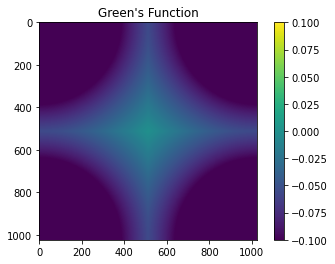

In [27]:
#from Jon's laplace_fft.py 

def greens(n,ndim=3):
    #get the potential from a point charge at (0,0)
    dx=np.arange(n)
    dx[n//2:]=dx[n//2:]-n
    if ndim==2:
        pot=np.zeros([n,n])
        xmat,ymat=np.meshgrid(dx,dx)
        dr=np.sqrt(xmat**2+ymat**2)
        dr[0,0]=1 #dial something in so we don't get errors
        pot=np.log(dr)/2/np.pi
        pot=pot-pot[n//2,n//2]  #set it so the potential at the edge goes to zero
        pot[0,0]=pot[0,1]-0.25 #we know the Laplacian in 2D picks up rho/4 at the zero point
        return pot
    
G = greens(1024,2)
plt.imshow(G)
plt.colorbar()
plt.title("Green's Function")
plt.show()

plt.imshow(G, vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title("Green's Function")
plt.show()

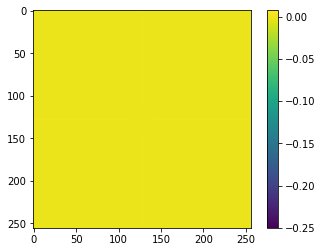

In [28]:
#code from class

VV = greens(256,2)
rho= VV-(np.roll(VV, 1, axis=0) + np.roll(VV,-1, axis=0) + np.roll(VV,1,axis=1) + np.roll(VV,-1, axis=1))/4
plt.imshow(rho)
plt.colorbar()
plt.show()

I am not sure what I should see...

In [42]:
#code from class

def make_Ax(x_org, mask):
    x = x_org.copy()
    x[mask] = 0
    tot = np.roll(x, 1, axis=0) + np.roll(x,-1, axis=0) + np.roll(x,1,axis=1) + np.roll(x,-1, axis=1)
    x = x-tot/4
    x[mask]=0
    return x

def make_rhs(x_org,mask):
    x = x_org.copy()
    not_mask = np.logical_not(mask)
    x[not_mask] = 0
    tot = np.roll(x, 1, axis=0) + np.roll(x,-1, axis=0) + np.roll(x,1,axis=1) + np.roll(x,-1, axis=1)
    tot[mask]=0
    return tot/4

#conjugate gradient recipe
def cg(b,x0,mask,niter=20,pause=0.01):
    Ax = make_Ax(x0,mask)
    rk=b-Ax
    pk=rk.copy()
    x=x0.copy()
    rtr=np.sum(rk*rk)
    for i in range (niter):
        Apk=make_Ax(pk,mask)
        pAp=np.sum(pk*Apk)
        ak=rtr/pAp
        x=x+ak*pk
        rnew=rk-ak*Apk
        rtr_new=np.sum(rnew*rnew)
        #print('on iteration,',i,'residual squared is',rtr_new)
        bk=rtr_new/rtr
        pk=rnew+bk*pk
        rk=rnew
        rtr=rtr_new
        #if (i%10)==0:
        #    display.clear_output(wait=True)
        #    plt.figure(figsize=(10,10))
        #    plt.imshow(rk)
        #    plt.colorbar()
        #    plt.pause(pause)
        
        
    return x
        

In [65]:
n=256
mask = np.zeros([n,n],dtype='bool')
bc=np.zeros([n,n])
mask[:,0]=True
mask[0,:]=True
mask[-1,:]=True
mask[:,-1]=True

mask[n//4:n//3 , n//4:n//3]=True
bc[n//4:n//3 , n//4:n//3] = 1.0


#plt.imshow(bc)
#plt.colorbar()
#plt.show()

b=make_rhs(bc,mask)
V=cg(b,0*bc,mask,niter=500,pause=0.1)
rho= VV-(np.roll(VV, 1, axis=0) + np.roll(VV,-1, axis=0) + np.roll(VV,1,axis=1) + np.roll(VV,-1, axis=1))/4
G = greens(n,2)
#G=np.pad(G,((1,1),(1,1)),mode='constant')
VV=V+bc
#VV=np.pad(VV,((1,1),(1,1)),mode='constant')

#convolution
V_potential = np.fft.ifft(np.fft.fft(G)*np.fft.fft(rho))


In [60]:
V_potential.shape

(258, 258)

84


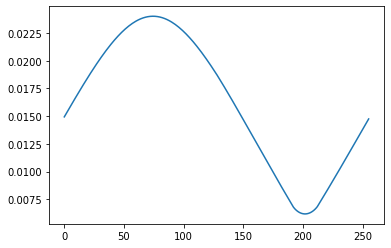

In [66]:
idx = np.argmax(np.abs(V_potential))
print(idx)
plt.plot(np.abs(V_potential[idx]))
plt.show()

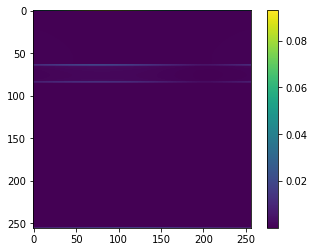

In [67]:
plt.imshow(np.abs(V_potential))
plt.colorbar()
plt.show()

Hmm... I have no idea what I am doing now. Hahahahaha
I need more time and there are other things to do! 
